# Diabetes Prediction
In this machine learning project, we will predict whether a person is suffering from Diabetes or not.

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the data set

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis (EDA)

In [3]:
# Lets check the shape of the dataset

df.shape

(768, 9)

In [4]:
# Lets see the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Lets see the description of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
# Lets see the columns of our dataset

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Number of patients without Diabetes: 500
Number of patients with Diabetes: 268


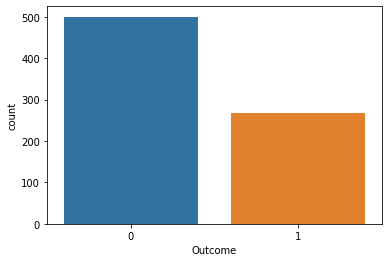

In [7]:
# Lets see whether our dataset is balanced or imbalanced with the help of countplot

sns.countplot(data = df, x = "Outcome", label = "Count")
LD, NLD = df["Outcome"].value_counts()
print("Number of patients without Diabetes: {}".format(LD))
print("Number of patients with Diabetes: {}".format(NLD))

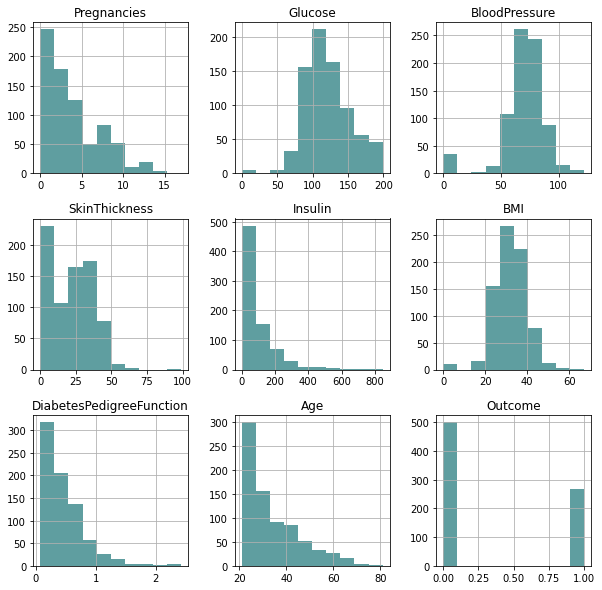

In [8]:
# Lets see the Histograms for each feature

df.hist(figsize = (10,10), color = "#5F9EA0")
plt.show();

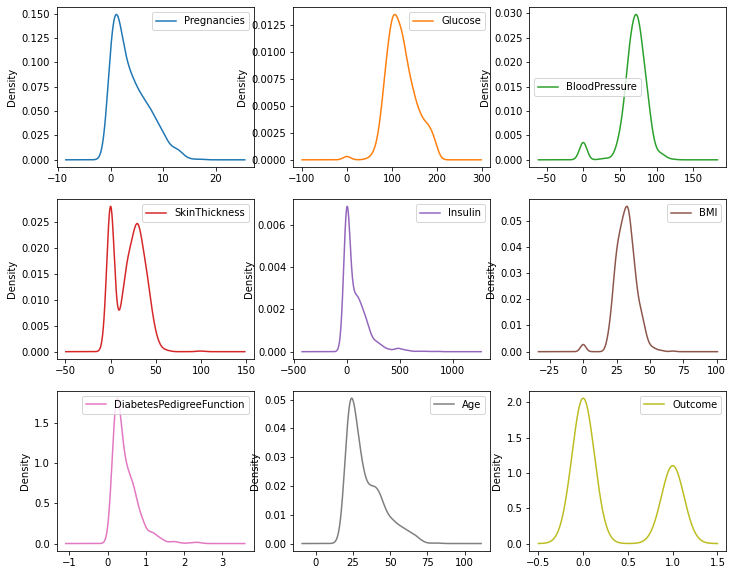

In [9]:
# Lets see the distributions of each features even more clearly using desity plots

df.plot(kind = "density", subplots = True, layout = (3,3), sharex =False, figsize = (12,10))
plt.show();

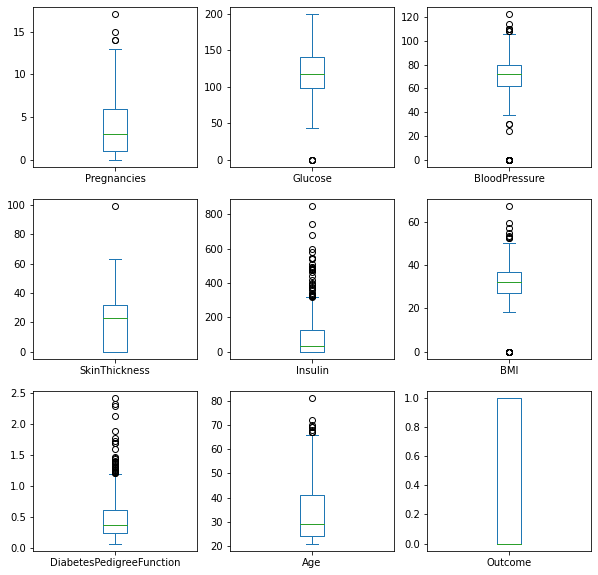

In [10]:
# Lets see the boxplots to check any outliers in our data

df.plot(kind = "box", subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (10,10))
plt.show();

We can see some amount of outliers present.

In [11]:
# Independent and Depenedent Features

Y = df["Outcome"]
list = ["Outcome"]
x = df.drop(list, axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


<AxesSubplot:>

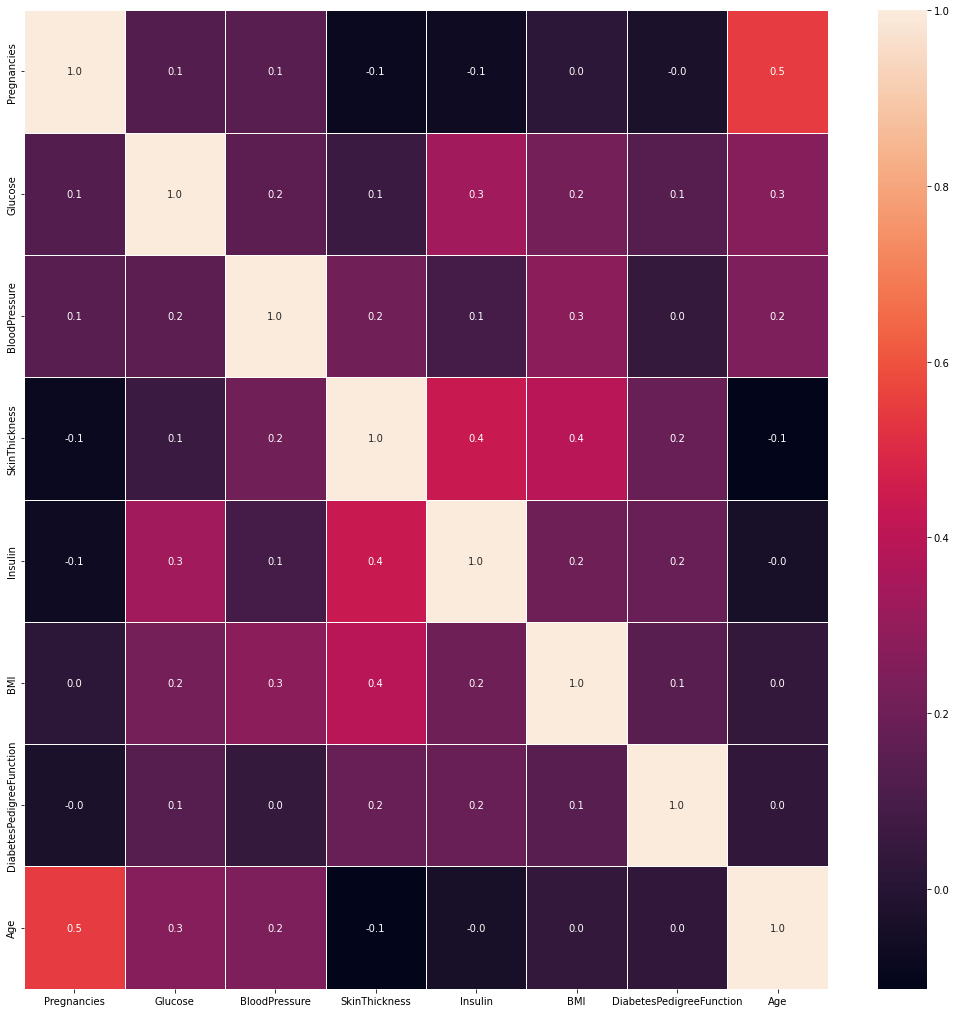

In [12]:
# Heatmap to see the correlation between the independent features

f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(x.corr(), annot = True, linewidth = 0.5, fmt = ".1f", ax = ax)

In [13]:
# Lets see the correlation matrix between all features

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


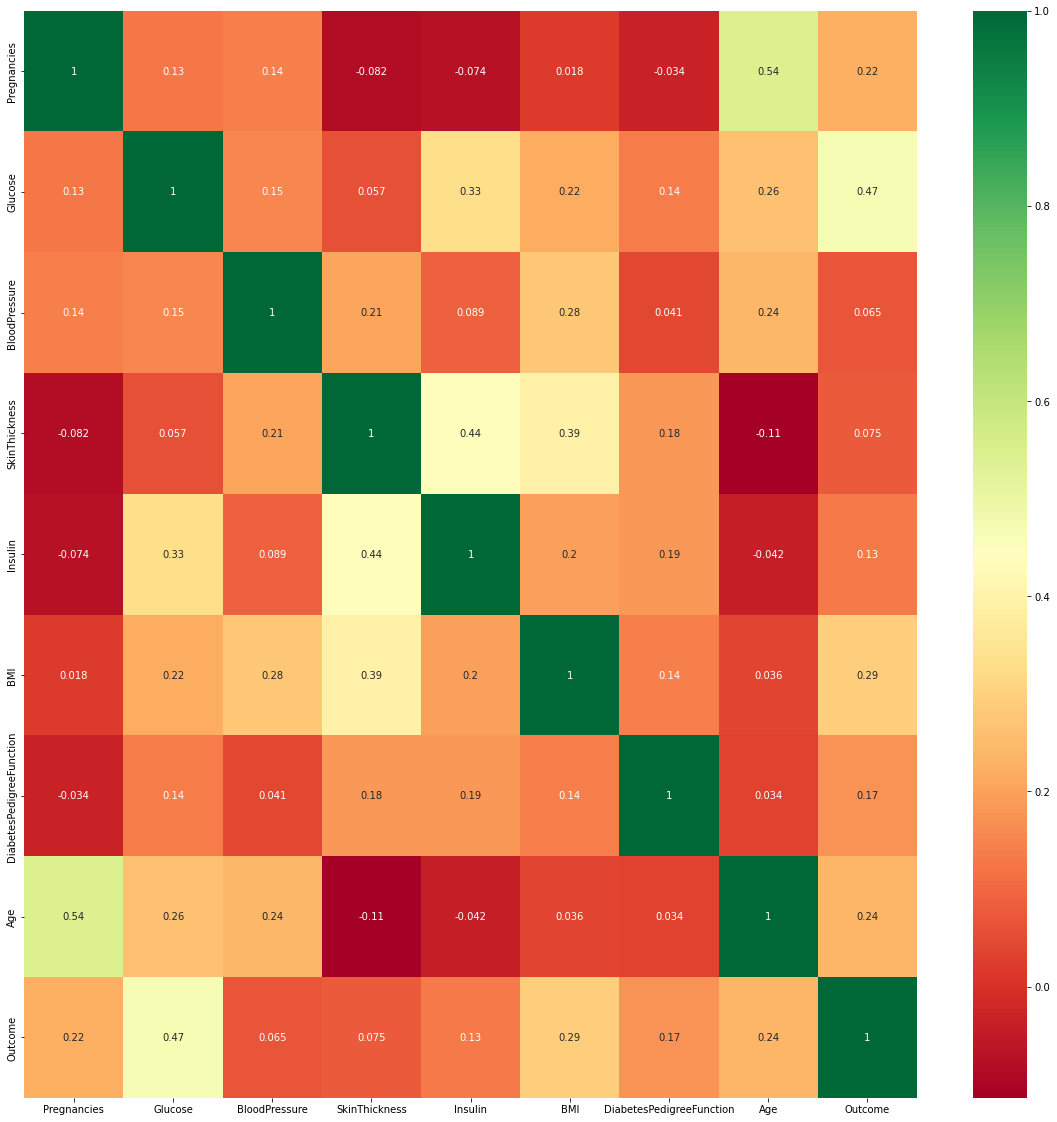

In [14]:
# Lets plot another heatmap including the target

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


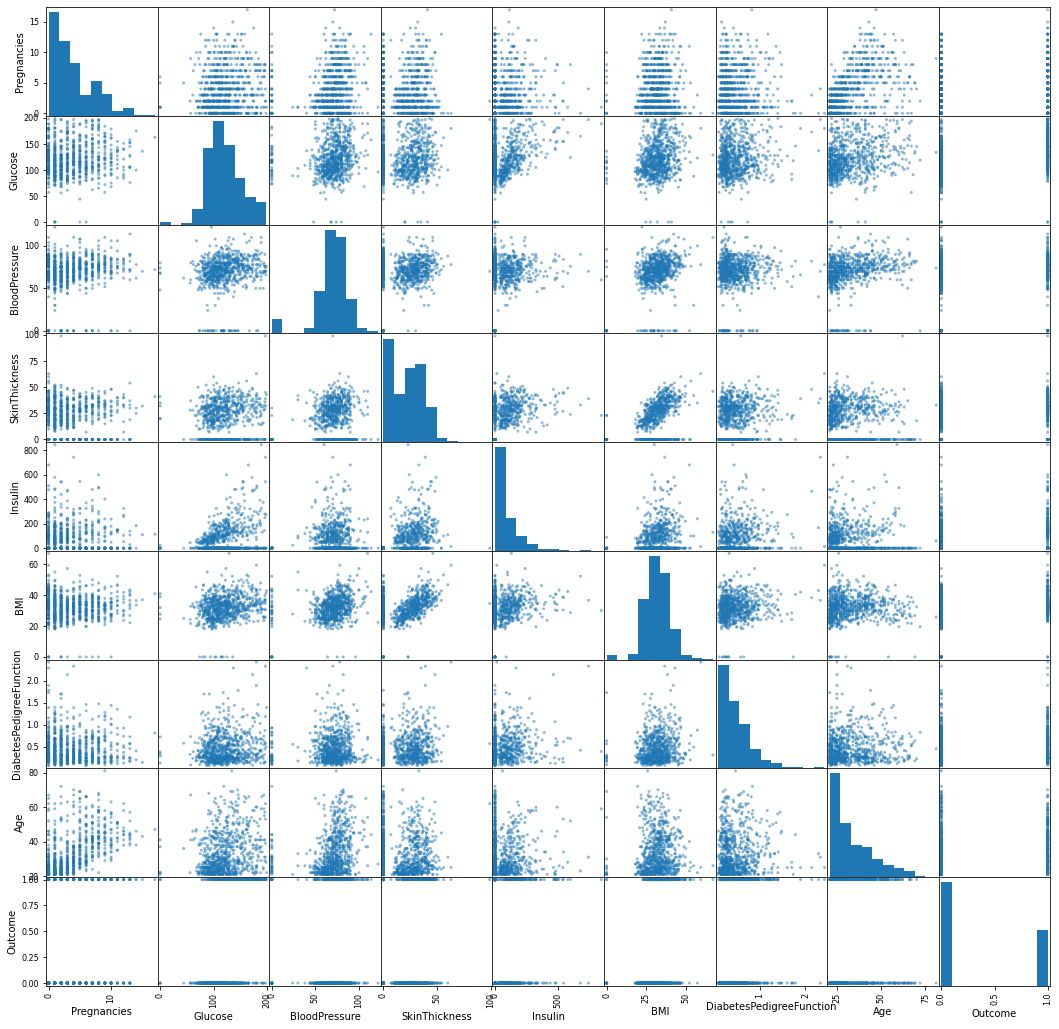

In [15]:
# Scatterplot

from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (18,18))
plt.show();

### Feature Engineering

In [16]:
# Checking null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no NaN values in our dataset.

In [17]:
# Checking how many zero values

print("total number of rows : {0}".format(len(df)))
print("number of rows zero in Pregnancies: {0}".format(len(df.loc[df['Pregnancies'] == 0])))
print("number of rows zero in Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows zero in BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows zero in SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows zero in Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows zero in BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows zero in DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows zero in Age: {0}".format(len(df.loc[df['Age'] == 0])))
print("number of rows zero in Outcome: {0}".format(len(df.loc[df['Outcome'] == 0])))

total number of rows : 768
number of rows zero in Pregnancies: 111
number of rows zero in Glucose: 5
number of rows zero in BloodPressure: 35
number of rows zero in SkinThickness: 227
number of rows zero in Insulin: 374
number of rows zero in BMI: 11
number of rows zero in DiabetesPedigreeFunction: 0
number of rows zero in Age: 0
number of rows zero in Outcome: 500


In [18]:
# Feature Selection

df.drop(['SkinThickness' ,'Insulin'], axis=1, inplace=True)
df = df.dropna(axis=0)

In [19]:
# Lets check our dataset

df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [20]:
# Independent and Dependent Feature

y = df['Outcome']
X = df.drop('Outcome', axis=1)

In [21]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [22]:
# Replacing the 0 values with mean

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = 0, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [23]:
# Lets see the shape of our train and test datasets

print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(537, 6), y:(537,)
Shape test set: X:(231, 6), y:(231,)


### Model Building

In [24]:
import xgboost
classifier = xgboost.XGBClassifier()

In [25]:
# Model Fitting

classifier.fit(X_train, y_train)

C:\Users\SWARNAVA\anaconda3\envs\health\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
# Model Prediction and Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pred = classifier.predict(X_test)

print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.7359307359307359
[[123  40]
 [ 21  47]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       163
           1       0.54      0.69      0.61        68

    accuracy                           0.74       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.76      0.74      0.74       231



### Hyperparameter Optimization

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
# Setting the parameters

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [29]:
classifier = xgboost.XGBClassifier()

In [30]:
# Initializing the parameters within RandomizedSearch

random_search=RandomizedSearchCV(classifier, param_distributions = params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [31]:
# Timer

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [32]:
# Model fitting

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\SWARNAVA\anaconda3\envs\health\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 12.06 seconds.


In [33]:
# Lets see the best parameters selected by RamdomizedSearchCV

random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
# Initializing the model with the best parameters

model=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [35]:
# Fitting with the model with the best parameters

model.fit(X_train, y_train)

[03:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [36]:
# Model Prediction and Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.7489177489177489
[[126  40]
 [ 18  47]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       166
           1       0.54      0.72      0.62        65

    accuracy                           0.75       231
   macro avg       0.71      0.74      0.72       231
weighted avg       0.78      0.75      0.76       231



In [37]:
### Saving the model for future use

import joblib
joblib.dump(model,r"C:\Users\SWARNAVA\Desktop\Healthcare\Diabetes\diabetes_model.pkl")

['C:\\Users\\SWARNAVA\\Desktop\\Healthcare\\Diabetes\\diabetes_model.pkl']